<a href="https://colab.research.google.com/github/emilytsen/credit_prediction/blob/main/classificador_renda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo da aula é classificar a renda de pequenos agricultores com relação aos seus dados **

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/adult.data', delimiter=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Adicionando os nomes das colunas
df.columns = [
    'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
    'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
    'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Income'
]

# Exibindo o DataFrame para verificar
print(df)

       Age          Workclass  Fnlwgt    Education  Education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital-status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

# separando as variaveis dependentes e independentes:

In [ ]:
previsores = df.iloc[:, 0:14].values
classe = df.iloc[:, 14].values
previsores

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

# transformando dados categoricos em números

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_previsores = LabelEncoder()
label_classe = LabelEncoder()

In [ ]:
previsores[:,1] = label_previsores.fit_transform(previsores[:,1])
previsores[:,3] = label_previsores.fit_transform(previsores[:,3])
previsores[:,5] = label_previsores.fit_transform(previsores[:,5])
previsores[:,6] = label_previsores.fit_transform(previsores[:,6])
previsores[:,7] = label_previsores.fit_transform(previsores[:,7])
previsores[:,8] = label_previsores.fit_transform(previsores[:,8])
previsores[:,9] = label_previsores.fit_transform(previsores[:,9])
previsores[:,13] = label_previsores.fit_transform(previsores[:,13])

# transformando o dado de classe para numero

In [ ]:
classe

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
classe = label_classe.fit_transform(classe)
classe

array([0, 0, 0, ..., 0, 0, 1])

# escalamento dos atributos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
previsores

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

# treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

# classificação

In [ ]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB() #algoritmo matematico que aprende com os dados de treinamento
classificador.fit(previsores_treinamento, classe_treinamento) #treino
previsoes = classificador.predict(previsores_teste) #teste
previsoes

array([0, 0, 0, ..., 0, 0, 0])

# Avaliação da previsão (acurácia)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

precisao

0.8045694632109077

In [ ]:
matriz

array([[5864,  295],
       [1296,  686]])

Acurácia: 0.8045694632109077
Precisão: 0.7898504263637005
Recall: 0.8045694632109077
F1-score: 0.7789018623013184


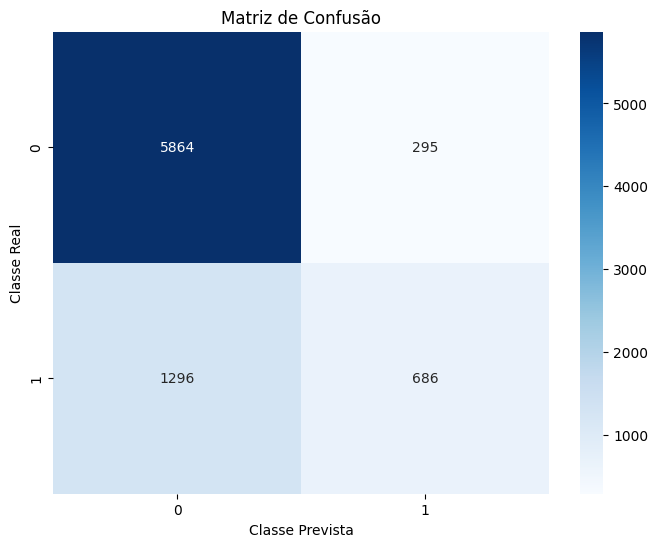

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha classe_teste e previsoes
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

# Métricas adicionais
precisao_score = precision_score(classe_teste, previsoes, average='weighted')
recall = recall_score(classe_teste, previsoes, average='weighted')
f1 = f1_score(classe_teste, previsoes, average='weighted')

# Exibir as métricas
print(f"Acurácia: {precisao}")
print(f"Precisão: {precisao_score}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.show()
